# Sandbox for development of Rainmaker

G. R. Tremblay, August 2016

In [57]:
import sys, os
import argparse
import numpy as np
from astropy.io import ascii
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline

Now we need to import rainmaker. Make sure this jupyter notebook is in the directory above the module, or that it is otherwise in your path! 

In [58]:
from rainmaker import rainmaker

In [59]:
filename = "rainmaker/accept_main_table.txt"
cluster_name_raw = "test"

The ACCEPT main table uses names (in the first column) that are written like "ABELL_2597", "ZWICKY_2107", etc. So simply ensure that the input cluster_name is in a format that will match that written in the ACCEPT table. This is easy: 

In [60]:
cluster_name = cluster_name_raw.replace(" ","_").upper()
cluster_name

'TEST'

In [61]:
data = ascii.read(filename)

In [62]:
# 'tcool5/2' is a bad column name. Change it if there. 
if 'tcool5/2' in data.columns:
    data.rename_column('tcool5/2', 'tcool52')
    
# 'tcool3/2' is also a bad column name. Change it if there. 
if 'tcool3/2' in data.columns:
    data.rename_column('tcool3/2', 'tcool32')

In [63]:
obs_by_name = data.group_by('Name')        
clusters_in_table = obs_by_name.groups.keys

In [64]:
cluster_found = cluster_name in clusters_in_table['Name']

In [65]:
cluster_found

False

In [66]:
len(data['Rin'])

11164

In [67]:
data['Rin']* u.kpc

<Quantity [ 1.1735 , 1.1526 , 1.1316 ,...,  0.03388, 0.01694, 0.     ] kpc>

In [68]:
r = (data['Rin'] + data['Rout']) * 0.5

In [69]:
logr = np.log10(r)

In [70]:
lognelec = np.log10(data['nelec'])

In [71]:
nbins = len(data['Rin'])
r = (data['Rin'] + data['Rout']) * 0.5
logr = np.log10(r)

lognelec = np.log10(data['nelec'])
logneerr = np.log10(data['neerr'] / data['nelec'])
yerror = logneerr

In [72]:
deg = 3

In [73]:
coeffs = np.polyfit(logr, lognelec, deg)

ValueError: On entry to DGELSD parameter number 6 had an illegal value

In [74]:
coeffs

NameError: name 'coeffs' is not defined

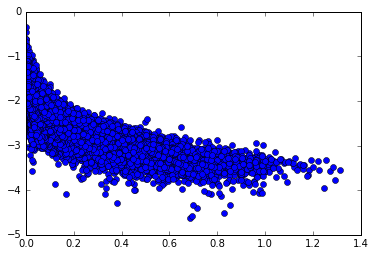

In [76]:
plt.plot(r,lognelec,'o')
plt.show()